In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import AnchoredText
import datetime
from datetime import datetime, timedelta
from tqdm import tqdm
 
import warnings
warnings.filterwarnings("ignore")

import sys
#!{sys.executable} -m pip install xlrd

In [2]:
d = datetime.today() - timedelta(days=300)
lag = 14 #Representa o período de tempo a se acumular

painel1 = pd.read_csv("HIST_PAINEL_COVIDBR_1.csv",sep=";")
painel1['codmun'] = painel1['codmun'].astype('Int32').astype(str)
painel1["data"] = painel1["data"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
painel1 = painel1.loc[(painel1["data"] >= d)]

painel2 = pd.read_csv("HIST_PAINEL_COVIDBR_2.csv",sep=";")
painel2['codmun'] = painel2['codmun'].astype('Int32').astype(str)
painel2["data"] = painel2["data"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
painel2 = painel2.loc[(painel2["data"] >= d)]

painel3 = pd.read_csv("HIST_PAINEL_COVIDBR_3.csv",sep=";")
painel3['codmun'] = painel3['codmun'].astype('Int32').astype(str)
painel3["data"] = painel3["data"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
painel3 = painel3.loc[(painel3["data"] >= d)]

painel4 = pd.read_csv("HIST_PAINEL_COVIDBR_4.csv",sep=";")
painel4['codmun'] = painel4['codmun'].astype('Int32').astype(str)
painel4["data"] = painel4["data"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
painel4 = painel4.loc[(painel4["data"] >= d)]


In [3]:
painel = painel1.append(painel2).append(painel3).append(painel4)
painel

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
107,Brasil,NaN,NaN,76,<NA>,NaN,NaN,2020-11-16,47,210147125.0,5876464.0,13371,166014,216,5322406.0,388044.0,NaN
108,Brasil,NaN,NaN,76,<NA>,NaN,NaN,2020-11-17,47,210147125.0,5911758.0,35294,166699,685,5361592.0,383467.0,NaN
109,Brasil,NaN,NaN,76,<NA>,NaN,NaN,2020-11-18,47,210147125.0,5945849.0,34091,167455,756,5389863.0,388531.0,NaN
110,Brasil,NaN,NaN,76,<NA>,NaN,NaN,2020-11-19,47,210147125.0,5981767.0,35918,168061,606,5407498.0,406208.0,NaN
111,Brasil,NaN,NaN,76,<NA>,NaN,NaN,2020-11-20,47,210147125.0,6020164.0,38397,168613,552,5422102.0,429449.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404563,Centro-Oeste,DF,Brasília,53,530010,53001.0,DISTRITO FEDERAL,2021-09-06,36,3015268.0,476143.0,1060,10144,16,NaN,NaN,1.0
404564,Centro-Oeste,DF,Brasília,53,530010,53001.0,DISTRITO FEDERAL,2021-09-07,36,3015268.0,476789.0,646,10156,12,NaN,NaN,1.0
404565,Centro-Oeste,DF,Brasília,53,530010,53001.0,DISTRITO FEDERAL,2021-09-08,36,3015268.0,477592.0,803,10166,10,NaN,NaN,1.0
404566,Centro-Oeste,DF,Brasília,53,530010,53001.0,DISTRITO FEDERAL,2021-09-09,36,3015268.0,478117.0,525,10178,12,NaN,NaN,1.0


In [4]:
regioes = pd.read_excel("RELATORIO_DTB_BRASIL_MUNICIPIO.xls")

regioes = regioes.drop(columns=['Nome_UF', 'Nome_Município', 'UF','Mesorregião Geográfica', 'Microrregião Geográfica', 
                                'Município'])

regioes.columns = ['Mesorregiao', 'Microrregiao', 'Codigo_Municipio']

regioes["codmun"] = regioes['Codigo_Municipio'].astype(str).str[:6]

regioes = regioes.drop(columns=['Codigo_Municipio'])

regioes.head()

,Mesorregiao,Microrregiao,codmun
0,Leste Rondoniense,Cacoal,110001
1,Leste Rondoniense,Cacoal,110037
2,Leste Rondoniense,Ariquemes,110040
3,Leste Rondoniense,Alvorada D'Oeste,110034
4,Leste Rondoniense,Ariquemes,110002


In [5]:
df = pd.merge(painel, regioes, on = 'codmun')
df = df.drop(columns=['coduf', 'codRegiaoSaude','nomeRegiaoSaude', 'semanaEpi', 'populacaoTCU2019',
                     'Recuperadosnovos', 'emAcompanhamentoNovos'])

df = df[df['casosAcumulado'] > 0]

df.head()

,regiao,estado,municipio,codmun,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana,Mesorregiao,Microrregiao
0,Norte,RO,Alta Floresta D'Oeste,110001,2020-11-16,923.0,0,12,0,0.0,Leste Rondoniense,Cacoal
1,Norte,RO,Alta Floresta D'Oeste,110001,2020-11-17,927.0,4,13,1,0.0,Leste Rondoniense,Cacoal
2,Norte,RO,Alta Floresta D'Oeste,110001,2020-11-18,928.0,1,13,0,0.0,Leste Rondoniense,Cacoal
3,Norte,RO,Alta Floresta D'Oeste,110001,2020-11-19,930.0,2,13,0,0.0,Leste Rondoniense,Cacoal
4,Norte,RO,Alta Floresta D'Oeste,110001,2020-11-20,932.0,2,13,0,0.0,Leste Rondoniense,Cacoal


In [6]:
df2 = pd.merge(painel, regioes, on = 'codmun')

df2["populacao"] = pd.to_numeric(df2["populacaoTCU2019"],errors='coerce')
df2["populacao"] = df2["populacao"].replace(np.nan, 0, regex=True)

Pop_Munic = df2.groupby(["estado","Mesorregiao","Microrregiao","municipio",'codmun'])["populacao"].mean().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao','municipio','codmun'])
Pop_Micro = Pop_Munic.groupby(["estado","Mesorregiao","Microrregiao"])["populacao"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao'])
Pop_Meso = Pop_Munic.groupby(["estado","Mesorregiao"])["populacao"].sum().reset_index().sort_values(["estado","Mesorregiao"])
Pop_Estado = Pop_Munic.groupby(["estado"])["populacao"].sum().reset_index().sort_values(["estado"])

## Gera lista distinta e ordenada de estados, macrorregiões, microrregiões e municípios

In [7]:
Estados = df.groupby(["estado"])["casosAcumulado"].sum().reset_index().sort_values(["estado"])
Estados = Estados.drop(columns='casosAcumulado')

Mesorregioes = df.groupby(["estado","Mesorregiao"])["casosAcumulado"].sum().reset_index().sort_values(["estado",'Mesorregiao'])
Mesorregioes = Mesorregioes.drop(columns='casosAcumulado')

Microrregioes = df.groupby(["estado","Mesorregiao","Microrregiao"])["casosAcumulado"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao'])
Microrregioes = Microrregioes.drop(columns='casosAcumulado')

Municipios = df.groupby(["estado","Mesorregiao","Microrregiao","municipio"])["casosAcumulado"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao','municipio'])
Municipios = Municipios.drop(columns='casosAcumulado')

## Gera dataframes com dados resumidos de casos e óbitos por localidade

In [8]:
#Casos por localidade
casosestado = df.groupby(["estado", "data"])["casosAcumulado"].sum().reset_index().sort_values(["estado",'data'])
casosmeso = df.groupby(["estado","Mesorregiao","data"])["casosAcumulado"].sum().reset_index().sort_values(["estado",'Mesorregiao','data'])
casosmicro = df.groupby(["estado","Mesorregiao","Microrregiao","data"])["casosAcumulado"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao','data'])
casosmunic = df.groupby(["estado","Mesorregiao","Microrregiao","municipio","data"])["casosAcumulado"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao',"municipio",'data'])

#Mortes por localidade
mortesestado = df.groupby(["estado","data"])["obitosAcumulado"].sum().reset_index().sort_values(["estado",'data'])
mortesmeso = df.groupby(["estado","Mesorregiao","data"])["obitosAcumulado"].sum().reset_index().sort_values(["estado",'Mesorregiao','data'])
mortesmicro = df.groupby(["estado","Mesorregiao","Microrregiao","data"])["obitosAcumulado"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao','data'])
mortesmunic = df.groupby(["estado","Mesorregiao","Microrregiao","municipio","data"])["obitosAcumulado"].sum().reset_index().sort_values(["estado","Mesorregiao",'Microrregiao',"municipio",'data'])

#Agrupa Casos e óbitos por localidade no mesmo DataFrame
df_estado = pd.merge(casosestado, mortesestado, on = ["estado","data"])
df_meso = pd.merge(casosmeso, mortesmeso, on = ["estado","Mesorregiao","data"])
df_micro = pd.merge(casosmicro, mortesmicro, on = ["estado","Mesorregiao", "Microrregiao","data"])
df_munic = pd.merge(casosmunic, mortesmunic, on = ["estado","Mesorregiao", "Microrregiao","municipio","data"])


In [9]:
# diferencas_munic = pd.DataFrame(columns=["estado","Mesorregiao",'Microrregiao',"municipio",'data', 'casosAcumulado', 
#                                          'obitosAcumulado', 'Dif_Quinz_Casos', 'Dif_Quinz_Obitos'])

# for municipio in Municipios.iloc[:,3]:
   
#     munic = df_munic[df_munic['municipio'] == municipio].reset_index(drop=True)

#     difcaso = []
#     difobito = []

#     for i in range(len(munic)):
#         if i < lag: 
#             difcaso.append(0)
#             difobito.append(0)
#         else:
#             difcaso.append(munic['casosAcumulado'][i]-munic['casosAcumulado'][i-lag])
#             difobito.append(munic['obitosAcumulado'][i]-munic['obitosAcumulado'][i-lag])

#     munic['Dif_Quinz_Casos'] = difcaso
#     munic['Dif_Quinz_Obitos'] = difobito
  
#     diferencas_munic = diferencas_munic.append(munic).reset_index(drop=True)
    
# diferencas_munic = pd.merge(diferencas_munic, Pop_Munic, on = ['estado','Mesorregiao','Microrregiao','municipio'])    
# diferencas_munic.to_csv("diferencas_munic.csv")

# diferencas_munic

In [10]:
diferencas_munic = pd.read_csv("diferencas_munic.csv")

In [11]:
diferencas_micro = pd.DataFrame(columns=["estado","Mesorregiao",'Microrregiao','data', 'casosAcumulado', 'obitosAcumulado', 'Dif_Quinz_Casos', 
                                   'Dif_Quinz_Obitos'])

for microregiao in Microrregioes.iloc[:,2]:
    
    micro = df_micro[df_micro['Microrregiao'] == microregiao].reset_index(drop=True)

    difcaso = []
    difobito = []

    for i in range(len(micro)):
        if i < lag: 
            difcaso.append(0)
            difobito.append(0)
        else:
            difcaso.append(micro['casosAcumulado'][i]-micro['casosAcumulado'][i-lag])
            difobito.append(micro['obitosAcumulado'][i]-micro['obitosAcumulado'][i-lag])

    micro['Dif_Quinz_Casos'] = difcaso
    micro['Dif_Quinz_Obitos'] = difobito
    
    diferencas_micro = diferencas_micro.append(micro).reset_index(drop=True)
    
diferencas_micro = pd.merge(diferencas_micro, Pop_Micro, on = ['estado','Mesorregiao','Microrregiao'])    
diferencas_micro

,estado,Mesorregiao,Microrregiao,data,casosAcumulado,obitosAcumulado,Dif_Quinz_Casos,Dif_Quinz_Obitos,populacao
0,AC,Vale do Acre,Brasiléia,2020-11-16,4022.0,55,0.0,0,71429.0
1,AC,Vale do Acre,Brasiléia,2020-11-17,4026.0,55,0.0,0,71429.0
2,AC,Vale do Acre,Brasiléia,2020-11-18,4028.0,55,0.0,0,71429.0
3,AC,Vale do Acre,Brasiléia,2020-11-19,4035.0,55,0.0,0,71429.0
4,AC,Vale do Acre,Brasiléia,2020-11-20,4059.0,55,0.0,0,71429.0
...,...,...,...,...,...,...,...,...,...
169229,TO,Oriental do Tocantins,Porto Nacional,2021-09-06,66447.0,933,1186.0,8,404882.0
169230,TO,Oriental do Tocantins,Porto Nacional,2021-09-07,66512.0,934,1177.0,9,404882.0
169231,TO,Oriental do Tocantins,Porto Nacional,2021-09-08,66567.0,934,1105.0,9,404882.0
169232,TO,Oriental do Tocantins,Porto Nacional,2021-09-09,66611.0,934,1064.0,9,404882.0


In [12]:
diferencas_meso = pd.DataFrame(columns=["estado",'Mesorregiao','data', 'casosAcumulado', 'obitosAcumulado', 'Dif_Quinz_Casos', 
                                   'Dif_Quinz_Obitos'])

for mesoregiao in Mesorregioes.iloc[:,1]:
    
    meso = df_meso[df_meso['Mesorregiao'] == mesoregiao].reset_index(drop=True)

    difcaso = []
    difobito = []

    for i in range(len(meso)):
        if i < lag: 
            difcaso.append(0)
            difobito.append(0)
        else:
            difcaso.append(meso['casosAcumulado'][i]-meso['casosAcumulado'][i-lag])
            difobito.append(meso['obitosAcumulado'][i]-meso['obitosAcumulado'][i-lag])

    meso['Dif_Quinz_Casos'] = difcaso
    meso['Dif_Quinz_Obitos'] = difobito
    
    diferencas_meso = diferencas_meso.append(meso).reset_index(drop=True)
    
diferencas_meso = pd.merge(diferencas_meso, Pop_Meso, on = ['estado','Mesorregiao'])    
diferencas_meso

,estado,Mesorregiao,data,casosAcumulado,obitosAcumulado,Dif_Quinz_Casos,Dif_Quinz_Obitos,populacao
0,AC,Vale do Acre,2020-11-16,22903.0,577,0.0,0,639139.0
1,AC,Vale do Acre,2020-11-17,23066.0,578,0.0,0,639139.0
2,AC,Vale do Acre,2020-11-18,23304.0,578,0.0,0,639139.0
3,AC,Vale do Acre,2020-11-19,23521.0,579,0.0,0,639139.0
4,AC,Vale do Acre,2020-11-20,23746.0,580,0.0,0,639139.0
...,...,...,...,...,...,...,...,...
40958,TO,Oriental do Tocantins,2021-09-06,84044.0,1243,1558.0,14,609476.0
40959,TO,Oriental do Tocantins,2021-09-07,84122.0,1244,1542.0,15,609476.0
40960,TO,Oriental do Tocantins,2021-09-08,84188.0,1245,1452.0,16,609476.0
40961,TO,Oriental do Tocantins,2021-09-09,84226.0,1245,1354.0,15,609476.0


In [13]:
diferencas_estado = pd.DataFrame(columns=["estado",'data', 'casosAcumulado', 'obitosAcumulado', 'Dif_Quinz_Casos','Dif_Quinz_Obitos'])

for estado in Estados.iloc[:,0]:
    
    est = df_estado[df_estado['estado'] == estado].reset_index(drop=True)

    difcaso = []
    difobito = []

    for i in range(len(est)):
        if i < lag: 
            difcaso.append(0)
            difobito.append(0)
        else:
            difcaso.append(est['casosAcumulado'][i]-est['casosAcumulado'][i-lag])
            difobito.append(est['obitosAcumulado'][i]-est['obitosAcumulado'][i-lag])

    est['Dif_Quinz_Casos'] = difcaso
    est['Dif_Quinz_Obitos'] = difobito
    
    diferencas_estado = diferencas_estado.append(est).reset_index(drop=True)
    
diferencas_estado = pd.merge(diferencas_estado, Pop_Estado, on = ['estado'])    
diferencas_estado

,estado,data,casosAcumulado,obitosAcumulado,Dif_Quinz_Casos,Dif_Quinz_Obitos,populacao
0,AC,2020-11-16,33295.0,708,0.0,0,881935.0
1,AC,2020-11-17,33475.0,709,0.0,0,881935.0
2,AC,2020-11-18,33725.0,709,0.0,0,881935.0
3,AC,2020-11-19,33976.0,710,0.0,0,881935.0
4,AC,2020-11-20,34246.0,711,0.0,0,881935.0
...,...,...,...,...,...,...,...
8068,TO,2021-09-06,220154.0,3702,3330.0,47,1572866.0
8069,TO,2021-09-07,220290.0,3704,3232.0,44,1572866.0
8070,TO,2021-09-08,220372.0,3706,2976.0,42,1572866.0
8071,TO,2021-09-09,220316.0,3706,2566.0,38,1572866.0


In [14]:
for id, est in enumerate(Estados.values):
    print(id, est)

def grafico_estado(id,tipo):
    
    if tipo == 'Dif_Quinz_Obitos':
        tipo1 = "Obitos"
    else:
        tipo1 = "Casos"
    
    X = diferencas_estado[diferencas_estado['estado']==Estados.iloc[:,0][id]].data[:]
    W = list(diferencas_estado[diferencas_estado['estado']==Estados.iloc[:,0][id]][tipo][:])
    Z = list(diferencas_estado[diferencas_estado['estado']==Estados.iloc[:,0][id]]['populacao'][:])
    
    Y = []

    for i in range(len(W)):
        Y.append(W[i]/Z[i])

    # Comandos para aumentar o tamanho do gráfico, definir eixo X como inteiro e inserir caixa de texto definida anteriormente
    ax=plt.figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k').gca()
    
    #Comando para plotar os casos reais, a curva estimada e a previsão para N dias futuros
    plt.plot(X, Y, 'r-',  linewidth=3)

    #Comandos para inserir título do gráfico, dos eixos e legenda
    plt.title("%População em novos " + tipo1 + " nos últimos 7 dias - Covid19 - " + Estados.values[id][0] , fontsize=22)
    plt.xlabel('Data', fontsize=16)
    plt.ylabel('%População em novos ' + tipo1, fontsize=16)

    #Exibe o gráfico
    plt.show()
    return X,Y

0 ['AC']
1 ['AL']
2 ['AM']
3 ['AP']
4 ['BA']
5 ['CE']
6 ['DF']
7 ['ES']
8 ['GO']
9 ['MA']
10 ['MG']
11 ['MS']
12 ['MT']
13 ['PA']
14 ['PB']
15 ['PE']
16 ['PI']
17 ['PR']
18 ['RJ']
19 ['RN']
20 ['RO']
21 ['RR']
22 ['RS']
23 ['SC']
24 ['SE']
25 ['SP']
26 ['TO']


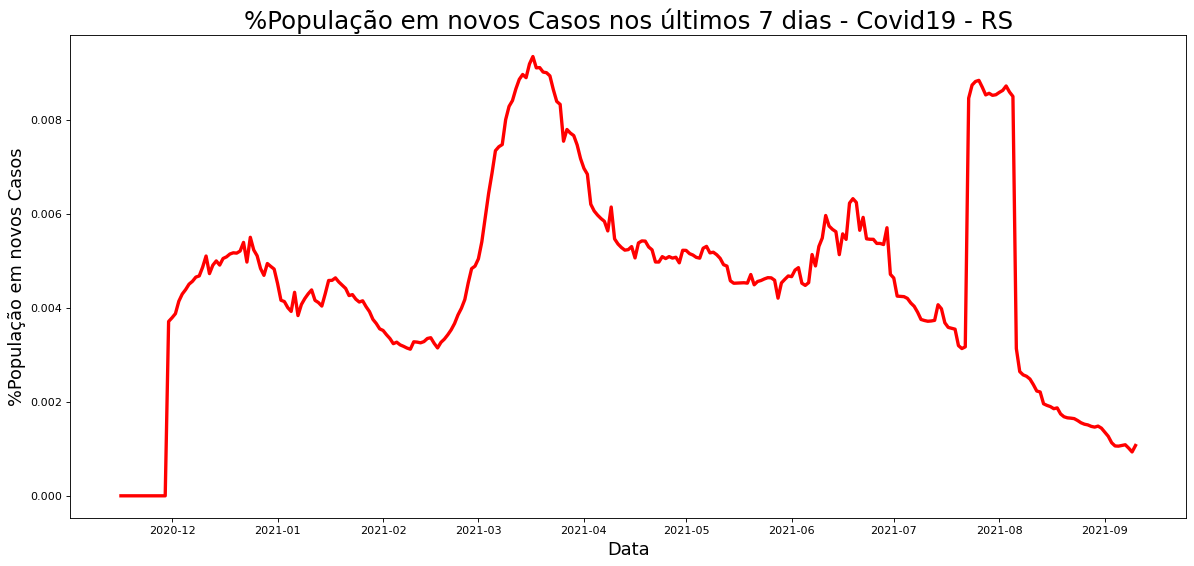

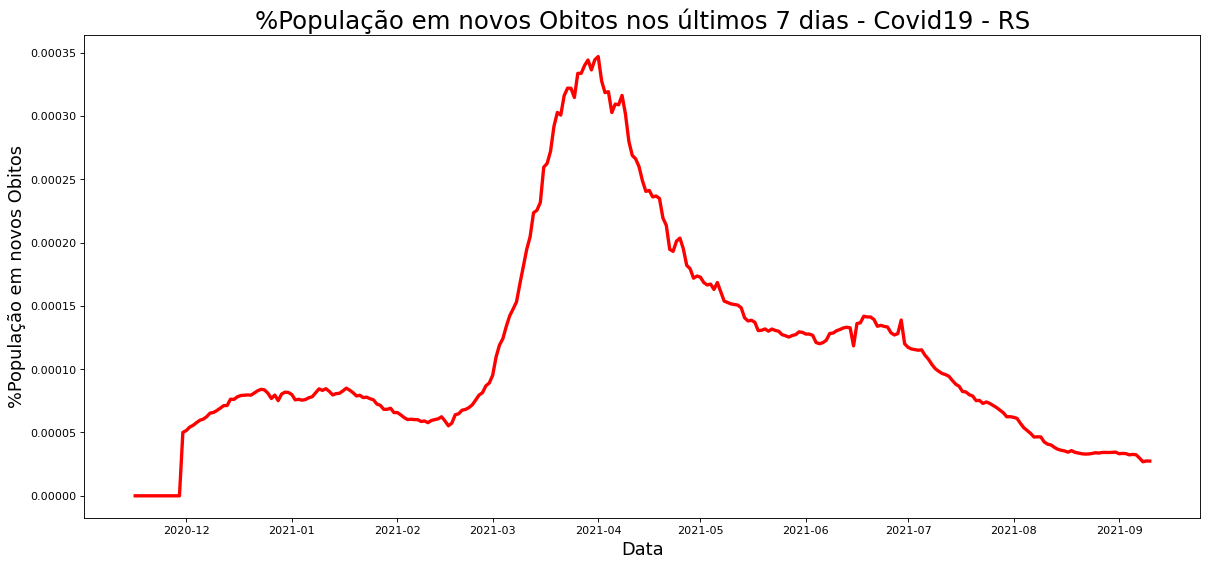

In [15]:
id = 22
X1,Y1 = grafico_estado(id,'Dif_Quinz_Casos')
X2,Y2 = grafico_estado(id,'Dif_Quinz_Obitos')

In [16]:
Y3 = [i * (-60) for i in Y2]

<BarContainer object of 299 artists>

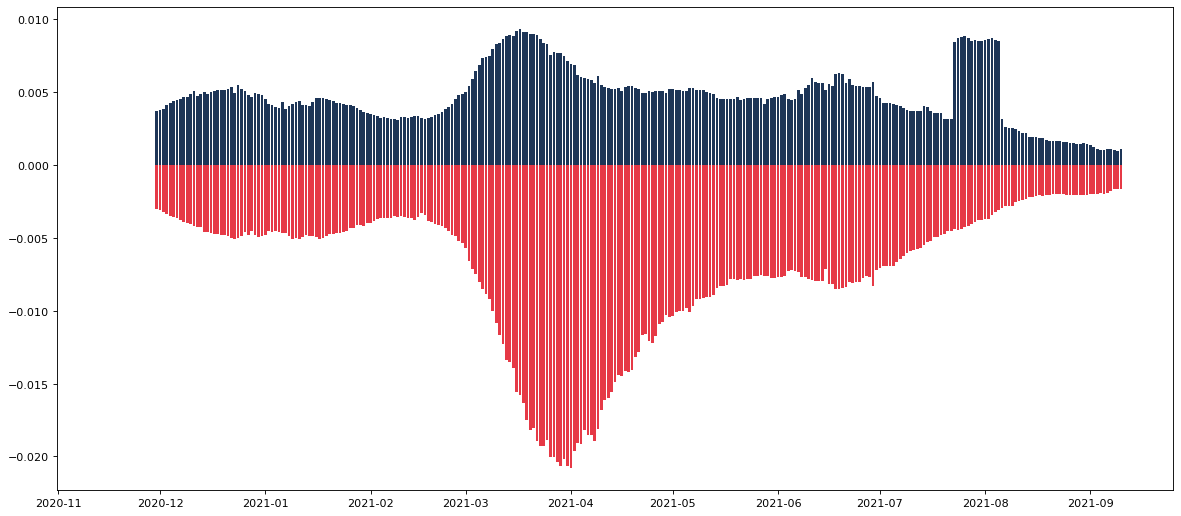

In [17]:
ax=plt.figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k').gca()
plt.bar(X1, Y1,  color="#1d3557")
plt.bar(X1, Y3, color="#e63946")

In [18]:
for id, meso in enumerate(Mesorregioes.values):
    print(id, meso)

def grafico_meso(id,tipo):
    
    if tipo == 'Dif_Quinz_Obitos':
        tipo1 = "Obitos"
    else:
        tipo1 = "Casos"
    
    X = diferencas_meso[diferencas_meso['Mesorregiao']==Mesorregioes.iloc[:,1][id]].data[:]
    W = list(diferencas_meso[diferencas_meso['Mesorregiao']==Mesorregioes.iloc[:,1][id]][tipo][:])
    Z = list(diferencas_meso[diferencas_meso['Mesorregiao']==Mesorregioes.iloc[:,1][id]]['populacao'][:])
    
    Y = []

    for i in range(len(W)):
        Y.append(W[i]/Z[i]*100)

    # Comandos para aumentar o tamanho do gráfico, definir eixo X como inteiro e inserir caixa de texto definida anteriormente
    ax=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k').gca()
    
    #Comando para plotar os casos reais, a curva estimada e a previsão para N dias futuros
    plt.plot(X, Y, 'r-',  linewidth=3)

    #Comandos para inserir título do gráfico, dos eixos e legenda
    plt.title("%População infectada nas últimas 03 semanas - " + Mesorregioes.iloc[:,0][id] + " - " + Mesorregioes.iloc[:,1][id] , fontsize=22)
    plt.xlabel('Data', fontsize=16)
    plt.ylabel('%População Infectada', fontsize=16)

    #Exibe o gráfico
    plt.show()

0 ['AC' 'Vale do Acre']
1 ['AC' 'Vale do Juruá']
2 ['AL' 'Agreste Alagoano']
3 ['AL' 'Leste Alagoano']
4 ['AL' 'Sertão Alagoano']
5 ['AM' 'Centro Amazonense']
6 ['AM' 'Norte Amazonense']
7 ['AM' 'Sudoeste Amazonense']
8 ['AM' 'Sul Amazonense']
9 ['AP' 'Norte do Amapá']
10 ['AP' 'Sul do Amapá']
11 ['BA' 'Centro Norte Baiano']
12 ['BA' 'Centro Sul Baiano']
13 ['BA' 'Extremo Oeste Baiano']
14 ['BA' 'Metropolitana de Salvador']
15 ['BA' 'Nordeste Baiano']
16 ['BA' 'Sul Baiano']
17 ['BA' 'Vale São-Franciscano da Bahia']
18 ['CE' 'Centro-Sul Cearense']
19 ['CE' 'Jaguaribe']
20 ['CE' 'Metropolitana de Fortaleza']
21 ['CE' 'Noroeste Cearense']
22 ['CE' 'Norte Cearense']
23 ['CE' 'Sertões Cearenses']
24 ['CE' 'Sul Cearense']
25 ['DF' 'Distrito Federal']
26 ['ES' 'Central Espírito-santense']
27 ['ES' 'Litoral Norte Espírito-santense']
28 ['ES' 'Noroeste Espírito-santense']
29 ['ES' 'Sul Espírito-santense']
30 ['GO' 'Centro Goiano']
31 ['GO' 'Leste Goiano']
32 ['GO' 'Noroeste Goiano']
33 ['GO' 'N

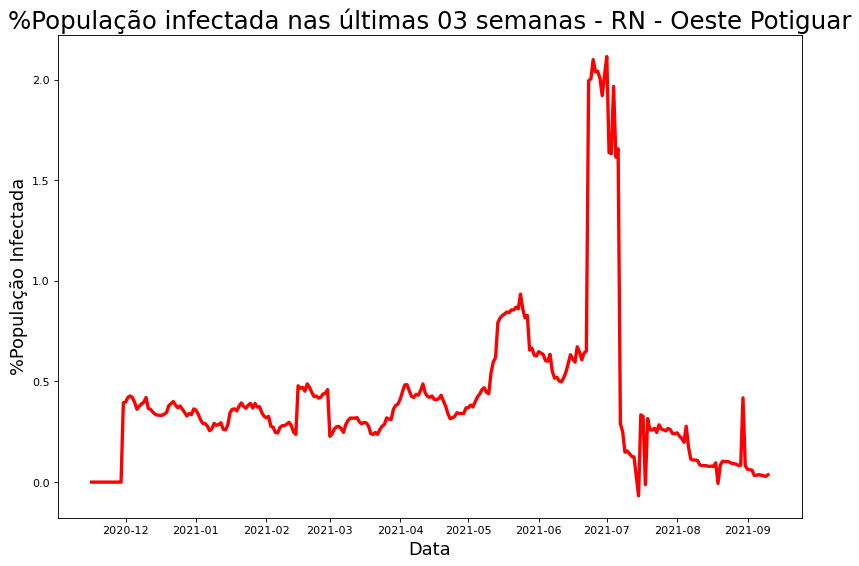

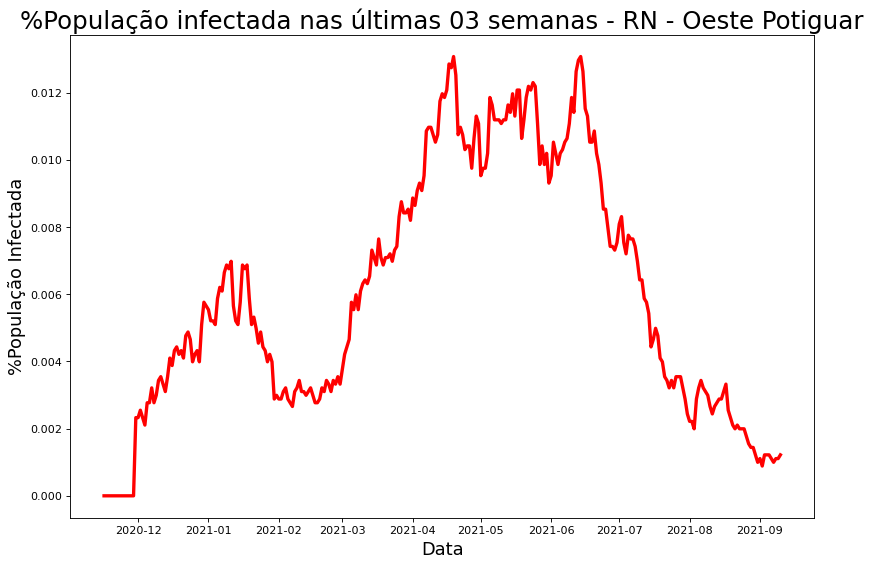

In [19]:
id = 99

grafico_meso(id,'Dif_Quinz_Casos')
grafico_meso(id,'Dif_Quinz_Obitos')

In [20]:
for id, micro in enumerate(Microrregioes.values):
    print(id, micro)

def grafico_micro(id,tipo):
    
    if tipo == 'Dif_Quinz_Obitos':
        tipo1 = "Obitos"
    else:
        tipo1 = "Casos"
    
    X = diferencas_micro[diferencas_micro['Microrregiao']==Microrregioes.iloc[:,2][id]].data[:]
    W = list(diferencas_micro[diferencas_micro['Microrregiao']==Microrregioes.iloc[:,2][id]][tipo][:])
    Z = list(diferencas_micro[diferencas_micro['Microrregiao']==Microrregioes.iloc[:,2][id]]['populacao'][:])
    
    Y = []

    for i in range(len(W)):
        Y.append(W[i]/Z[i])


    # Comandos para aumentar o tamanho do gráfico, definir eixo X como inteiro e inserir caixa de texto definida anteriormente
    ax=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k').gca()
    
    #Comando para plotar os casos reais, a curva estimada e a previsão para N dias futuros
    plt.plot(X, Y, 'r-',  linewidth=3)

    #Comandos para inserir título do gráfico, dos eixos e legenda
    plt.title("Aumento quinzenal " + tipo1 + " Covid19 - " + Microrregioes.iloc[:,0][id] + " - " + Microrregioes.iloc[:,2][id] , fontsize=22)
    plt.xlabel('Data', fontsize=16)
    plt.ylabel('Incremento quinzenal Nro ' + tipo1, fontsize=16)

    #Exibe o gráfico
    plt.show()

0 ['AC' 'Vale do Acre' 'Brasiléia']
1 ['AC' 'Vale do Acre' 'Rio Branco']
2 ['AC' 'Vale do Acre' 'Sena Madureira']
3 ['AC' 'Vale do Juruá' 'Cruzeiro do Sul']
4 ['AC' 'Vale do Juruá' 'Tarauacá']
5 ['AL' 'Agreste Alagoano' 'Arapiraca']
6 ['AL' 'Agreste Alagoano' 'Palmeira dos Índios']
7 ['AL' 'Agreste Alagoano' 'Traipu']
8 ['AL' 'Leste Alagoano' 'Litoral Norte Alagoano']
9 ['AL' 'Leste Alagoano' 'Maceió']
10 ['AL' 'Leste Alagoano' 'Mata Alagoana']
11 ['AL' 'Leste Alagoano' 'Penedo']
12 ['AL' 'Leste Alagoano' 'Serrana dos Quilombos']
13 ['AL' 'Leste Alagoano' 'São Miguel dos Campos']
14 ['AL' 'Sertão Alagoano' 'Alagoana do Sertão do São Francisco']
15 ['AL' 'Sertão Alagoano' 'Batalha']
16 ['AL' 'Sertão Alagoano' 'Santana do Ipanema']
17 ['AL' 'Sertão Alagoano' 'Serrana do Sertão Alagoano']
18 ['AM' 'Centro Amazonense' 'Coari']
19 ['AM' 'Centro Amazonense' 'Itacoatiara']
20 ['AM' 'Centro Amazonense' 'Manaus']
21 ['AM' 'Centro Amazonense' 'Parintins']
22 ['AM' 'Centro Amazonense' 'Rio Preto 

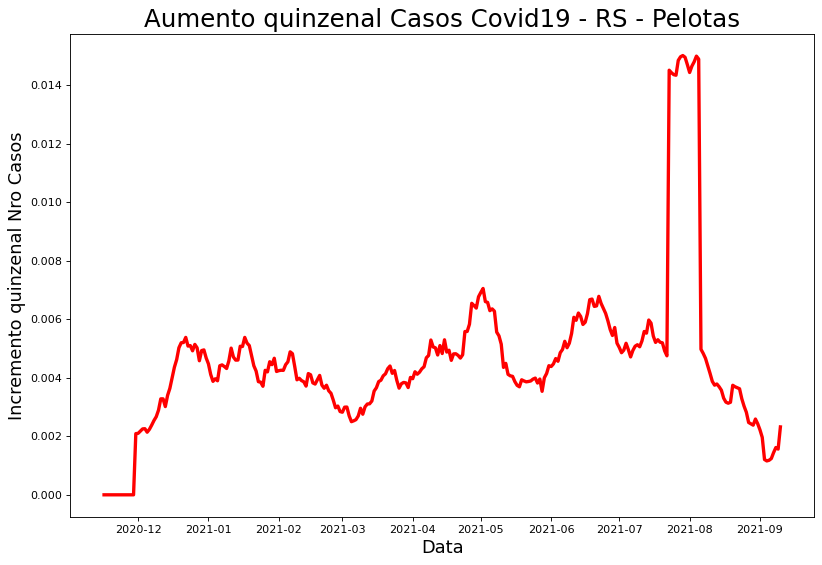

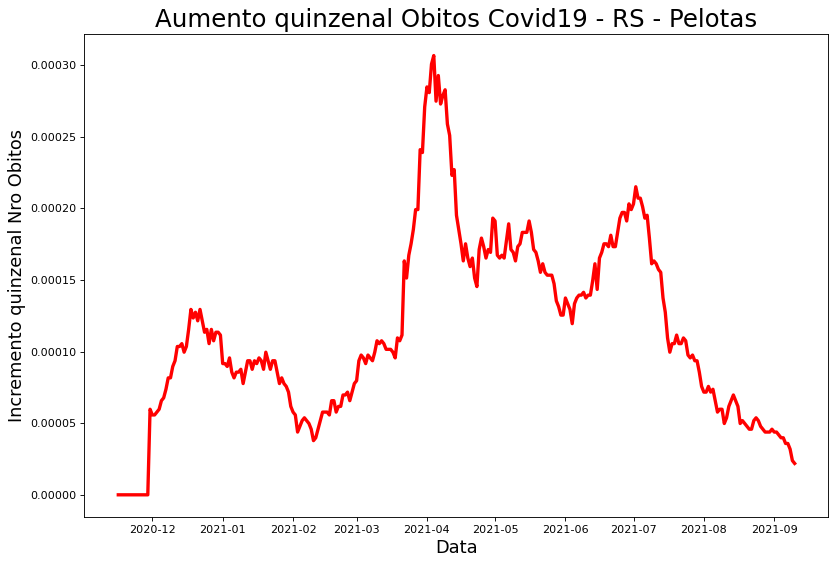

In [21]:
id = 449
grafico_micro(id,'Dif_Quinz_Casos')
grafico_micro(id,'Dif_Quinz_Obitos')

In [22]:
for id, munic in enumerate(Municipios.values):
    print(id, munic)

def grafico_munic(id,tipo):
    
    if tipo == 'Dif_Quinz_Obitos':
        tipo1 = "Obitos"
    else:
        tipo1 = "Casos"
    
    X = diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])].data[:]
    W = list(diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])][tipo][:])
    Z = list(diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])]['populacao'][:])
    
    Y = []

    for i in range(len(W)):
        Y.append(W[i]/Z[i])

    # Comandos para aumentar o tamanho do gráfico, definir eixo X como inteiro e inserir caixa de texto definida anteriormente
    ax=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k').gca()
    
    #Comando para plotar os casos reais, a curva estimada e a previsão para N dias futuros
    plt.plot(X, Y, 'r-',  linewidth=3)

    #Comandos para inserir título do gráfico, dos eixos e legenda
    plt.title("Aumento quinzenal " + tipo1 + " Covid19 - " + Municipios.iloc[:,0][id] + " - " + Municipios.iloc[:,3][id] , fontsize=22)
    plt.xlabel('Data', fontsize=16)
    plt.ylabel('Incremento quinzenal Nro ' + tipo1, fontsize=16)

    #Exibe o gráfico
    plt.show()

0 ['AC' 'Vale do Acre' 'Brasiléia' 'Assis Brasil']
1 ['AC' 'Vale do Acre' 'Brasiléia' 'Brasiléia']
2 ['AC' 'Vale do Acre' 'Brasiléia' 'Epitaciolândia']
3 ['AC' 'Vale do Acre' 'Brasiléia' 'Xapuri']
4 ['AC' 'Vale do Acre' 'Rio Branco' 'Acrelândia']
5 ['AC' 'Vale do Acre' 'Rio Branco' 'Bujari']
6 ['AC' 'Vale do Acre' 'Rio Branco' 'Capixaba']
7 ['AC' 'Vale do Acre' 'Rio Branco' 'Plácido de Castro']
8 ['AC' 'Vale do Acre' 'Rio Branco' 'Porto Acre']
9 ['AC' 'Vale do Acre' 'Rio Branco' 'Rio Branco']
10 ['AC' 'Vale do Acre' 'Rio Branco' 'Senador Guiomard']
11 ['AC' 'Vale do Acre' 'Sena Madureira' 'Manoel Urbano']
12 ['AC' 'Vale do Acre' 'Sena Madureira' 'Santa Rosa do Purus']
13 ['AC' 'Vale do Acre' 'Sena Madureira' 'Sena Madureira']
14 ['AC' 'Vale do Juruá' 'Cruzeiro do Sul' 'Cruzeiro do Sul']
15 ['AC' 'Vale do Juruá' 'Cruzeiro do Sul' 'Marechal Thaumaturgo']
16 ['AC' 'Vale do Juruá' 'Cruzeiro do Sul' 'Mâncio Lima']
17 ['AC' 'Vale do Juruá' 'Cruzeiro do Sul' 'Porto Walter']
18 ['AC' 'Vale do 

798 ['CE' 'Sul Cearense' 'Chapada do Araripe' 'Araripe']
799 ['CE' 'Sul Cearense' 'Chapada do Araripe' 'Assaré']
800 ['CE' 'Sul Cearense' 'Chapada do Araripe' 'Campos Sales']
801 ['CE' 'Sul Cearense' 'Chapada do Araripe' 'Potengi']
802 ['CE' 'Sul Cearense' 'Chapada do Araripe' 'Salitre']
803 ['DF' 'Distrito Federal' 'Brasília' 'Brasília']
804 ['ES' 'Central Espírito-santense' 'Afonso Cláudio' 'Afonso Cláudio']
805 ['ES' 'Central Espírito-santense' 'Afonso Cláudio' 'Brejetuba']
806 ['ES' 'Central Espírito-santense' 'Afonso Cláudio' 'Conceição do Castelo']
807 ['ES' 'Central Espírito-santense' 'Afonso Cláudio' 'Domingos Martins']
808 ['ES' 'Central Espírito-santense' 'Afonso Cláudio' 'Laranja da Terra']
809 ['ES' 'Central Espírito-santense' 'Afonso Cláudio' 'Marechal Floriano']
810 ['ES' 'Central Espírito-santense' 'Afonso Cláudio'
 'Venda Nova do Imigrante']
811 ['ES' 'Central Espírito-santense' 'Guarapari' 'Alfredo Chaves']
812 ['ES' 'Central Espírito-santense' 'Guarapari' 'Anchieta']


1481 ['MG' 'Metropolitana de Belo Horizonte' 'Belo Horizonte' 'Santa Luzia']
1482 ['MG' 'Metropolitana de Belo Horizonte' 'Belo Horizonte' 'Sarzedo']
1483 ['MG' 'Metropolitana de Belo Horizonte' 'Belo Horizonte'
 'São Joaquim de Bicas']
1484 ['MG' 'Metropolitana de Belo Horizonte' 'Belo Horizonte'
 'São José da Lapa']
1485 ['MG' 'Metropolitana de Belo Horizonte' 'Belo Horizonte' 'Vespasiano']
1486 ['MG' 'Metropolitana de Belo Horizonte' 'Conceição do Mato Dentro'
 'Alvorada de Minas']
1487 ['MG' 'Metropolitana de Belo Horizonte' 'Conceição do Mato Dentro'
 'Conceição do Mato Dentro']
1488 ['MG' 'Metropolitana de Belo Horizonte' 'Conceição do Mato Dentro'
 'Congonhas do Norte']
1489 ['MG' 'Metropolitana de Belo Horizonte' 'Conceição do Mato Dentro'
 'Dom Joaquim']
1490 ['MG' 'Metropolitana de Belo Horizonte' 'Conceição do Mato Dentro'
 'Itambé do Mato Dentro']
1491 ['MG' 'Metropolitana de Belo Horizonte' 'Conceição do Mato Dentro'
 'Morro do Pilar']
1492 ['MG' 'Metropolitana de Belo Hor

2444 ['PA' 'Marajó' 'Furos de Breves' 'São Sebastião da Boa Vista']
2445 ['PA' 'Marajó' 'Portel' 'Bagre']
2446 ['PA' 'Marajó' 'Portel' 'Gurupá']
2447 ['PA' 'Marajó' 'Portel' 'Melgaço']
2448 ['PA' 'Marajó' 'Portel' 'Portel']
2449 ['PA' 'Metropolitana de Belém' 'Belém' 'Ananindeua']
2450 ['PA' 'Metropolitana de Belém' 'Belém' 'Barcarena']
2451 ['PA' 'Metropolitana de Belém' 'Belém' 'Belém']
2452 ['PA' 'Metropolitana de Belém' 'Belém' 'Benevides']
2453 ['PA' 'Metropolitana de Belém' 'Belém' 'Marituba']
2454 ['PA' 'Metropolitana de Belém' 'Belém' 'Santa Bárbara do Pará']
2455 ['PA' 'Metropolitana de Belém' 'Castanhal' 'Bujaru']
2456 ['PA' 'Metropolitana de Belém' 'Castanhal' 'Castanhal']
2457 ['PA' 'Metropolitana de Belém' 'Castanhal' 'Inhangapi']
2458 ['PA' 'Metropolitana de Belém' 'Castanhal' 'Santa Izabel do Pará']
2459 ['PA' 'Metropolitana de Belém' 'Castanhal' 'Santo Antônio do Tauá']
2460 ['PA' 'Nordeste Paraense' 'Bragantina' 'Augusto Corrêa']
2461 ['PA' 'Nordeste Paraense' 'Bragant

3230 ['PR' 'Centro Oriental Paranaense' 'Telêmaco Borba' 'Telêmaco Borba']
3231 ['PR' 'Centro Oriental Paranaense' 'Telêmaco Borba' 'Tibagi']
3232 ['PR' 'Centro Oriental Paranaense' 'Telêmaco Borba' 'Ventania']
3233 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Campina do Simão']
3234 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Candói']
3235 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Cantagalo']
3236 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Espigão Alto do Iguaçu']
3237 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Foz do Jordão']
3238 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Goioxim']
3239 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Guarapuava']
3240 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Inácio Martins']
3241 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Laranjeiras do Sul']
3242 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Marquinho']
3243 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Nova Laranjeiras']
3244 ['PR' 'Centro-Sul Paranaense' 'Guarapuava' 'Pinhão']
3245 ['PR' 'Centro-

4072 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Araricá']
4073 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Cachoeirinha']
4074 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Campo Bom']
4075 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Canoas']
4076 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Eldorado do Sul']
4077 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Esteio']
4078 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Estância Velha']
4079 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Glorinha']
4080 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Gravataí']
4081 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Guaíba']
4082 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Mariana Pimentel']
4083 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Nova Hartz']
4084 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Nova Santa Rita']
4085 ['RS' 'Metropolitana de Porto Alegre' 'Porto Alegre' 'Nov

4743 ['SE' 'Leste Sergipano' 'Boquim' 'Itabaianinha']
4744 ['SE' 'Leste Sergipano' 'Boquim' 'Pedrinhas']
4745 ['SE' 'Leste Sergipano' 'Boquim' 'Salgado']
4746 ['SE' 'Leste Sergipano' 'Boquim' 'Tomar do Geru']
4747 ['SE' 'Leste Sergipano' 'Boquim' 'Umbaúba']
4748 ['SE' 'Leste Sergipano' 'Cotinguiba' 'Capela']
4749 ['SE' 'Leste Sergipano' 'Cotinguiba' 'Divina Pastora']
4750 ['SE' 'Leste Sergipano' 'Cotinguiba' 'Santa Rosa de Lima']
4751 ['SE' 'Leste Sergipano' 'Cotinguiba' 'Siriri']
4752 ['SE' 'Leste Sergipano' 'Estância' 'Estância']
4753 ['SE' 'Leste Sergipano' 'Estância' 'Indiaroba']
4754 ['SE' 'Leste Sergipano' 'Estância' "Itaporanga d'Ajuda"]
4755 ['SE' 'Leste Sergipano' 'Estância' 'Santa Luzia do Itanhy']
4756 ['SE' 'Leste Sergipano' 'Japaratuba' 'Japaratuba']
4757 ['SE' 'Leste Sergipano' 'Japaratuba' 'Japoatã']
4758 ['SE' 'Leste Sergipano' 'Japaratuba' 'Pacatuba']
4759 ['SE' 'Leste Sergipano' 'Japaratuba' 'Pirambu']
4760 ['SE' 'Leste Sergipano' 'Japaratuba' 'São Francisco']
4761 ['

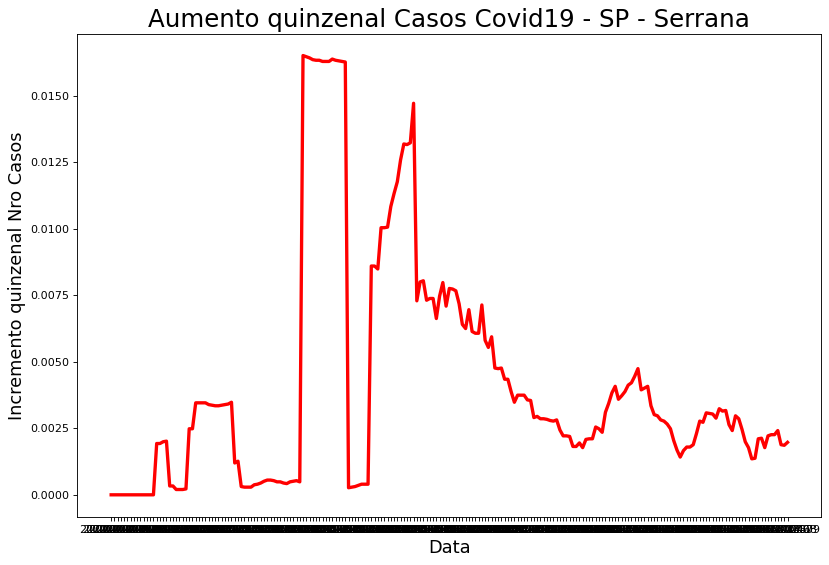

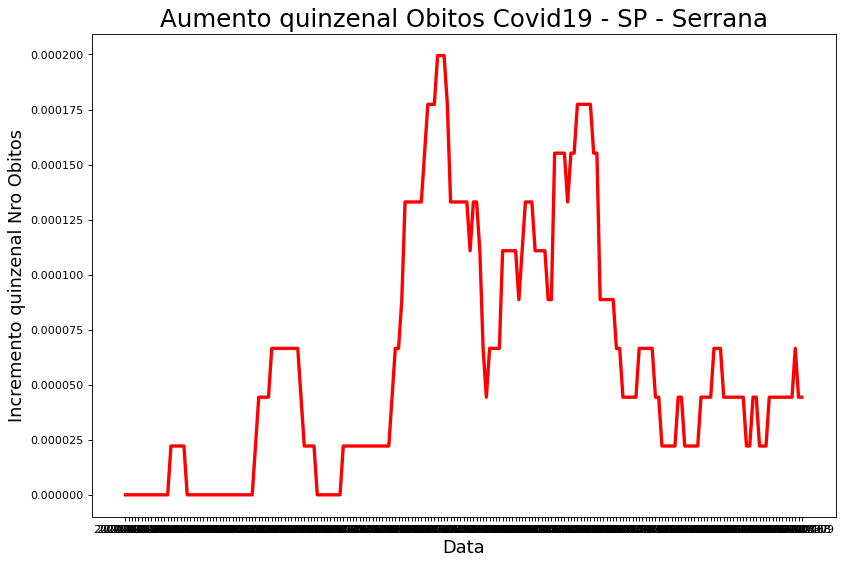

In [23]:
id = 5271
grafico_munic(id,'Dif_Quinz_Casos')
grafico_munic(id,'Dif_Quinz_Obitos')

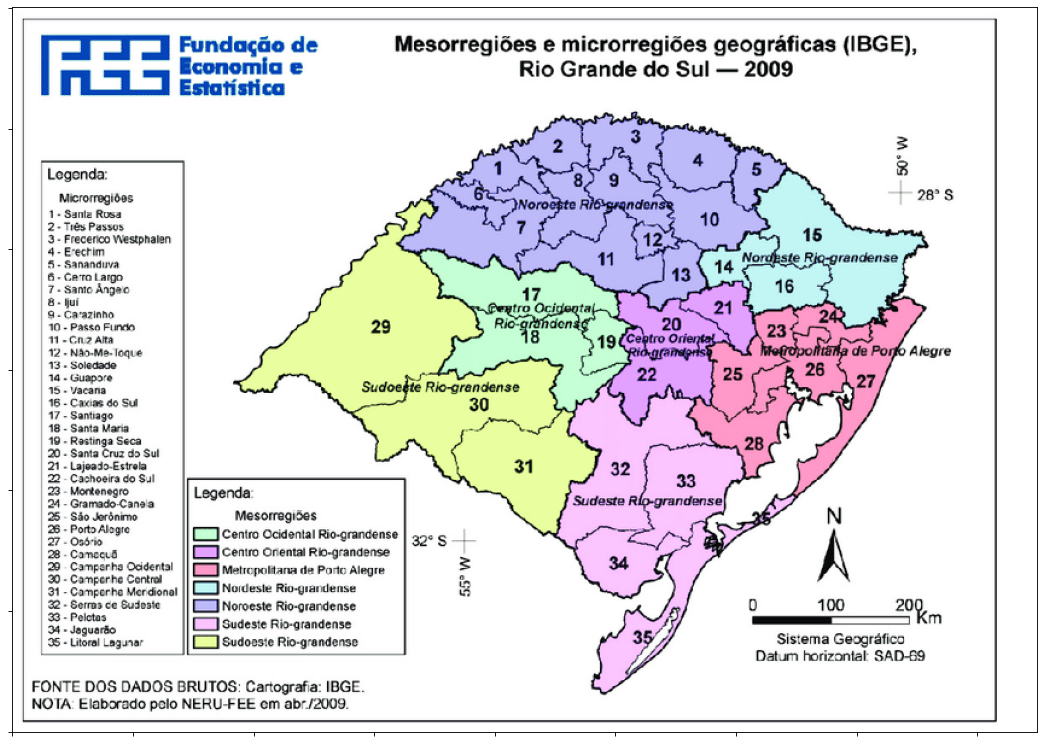

In [24]:
# importing pyplot and image from matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading png image file 
im = img.imread('microrregioes_rs.png') 
ax=plt.figure(figsize=(18, 12), dpi=80).gca()
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])    
  
# show image 
plt.imshow(im) 

 # Plota todos os estados juntos

In [25]:
#id_ini = Mesorregioes.estado[Mesorregioes.estado=="RS"].index.values.min()
#id_fim1 = Mesorregioes.estado[Mesorregioes.estado=="RS"].index.values.max()

#id_ini = Microrregioes.estado[Microrregioes.estado=="RS"].index.values.min()
#id_fim1 = Microrregioes.estado[Microrregioes.estado=="RS"].index.values.max()

id_ini = Estados.index.values.min()
id_fim1 = Estados.index.values.max()

#id_ini = 0
#id_fim1 = 26

n_arquivos = int((id_fim1-id_ini)/25)+1
n_graficos = round((id_fim1-id_ini)/n_arquivos)

id_fim = id_fim1 #id_ini + n_graficos

cols = 5
Sharey = True

df = Estados.copy()
difs = diferencas_estado.copy()
tipo_local = 'estado'

#df = Mesorregioes.copy()
#difs = diferencas_meso.copy()
#tipo_local = 'Mesorregiao'

#df = Microrregioes.copy()
#difs = diferencas_micro.copy()
#tipo_local = 'Microrregiao'

#df = Municipios.copy()
#difs = diferencas_munic.copy()
#tipo_local = 'municipio'


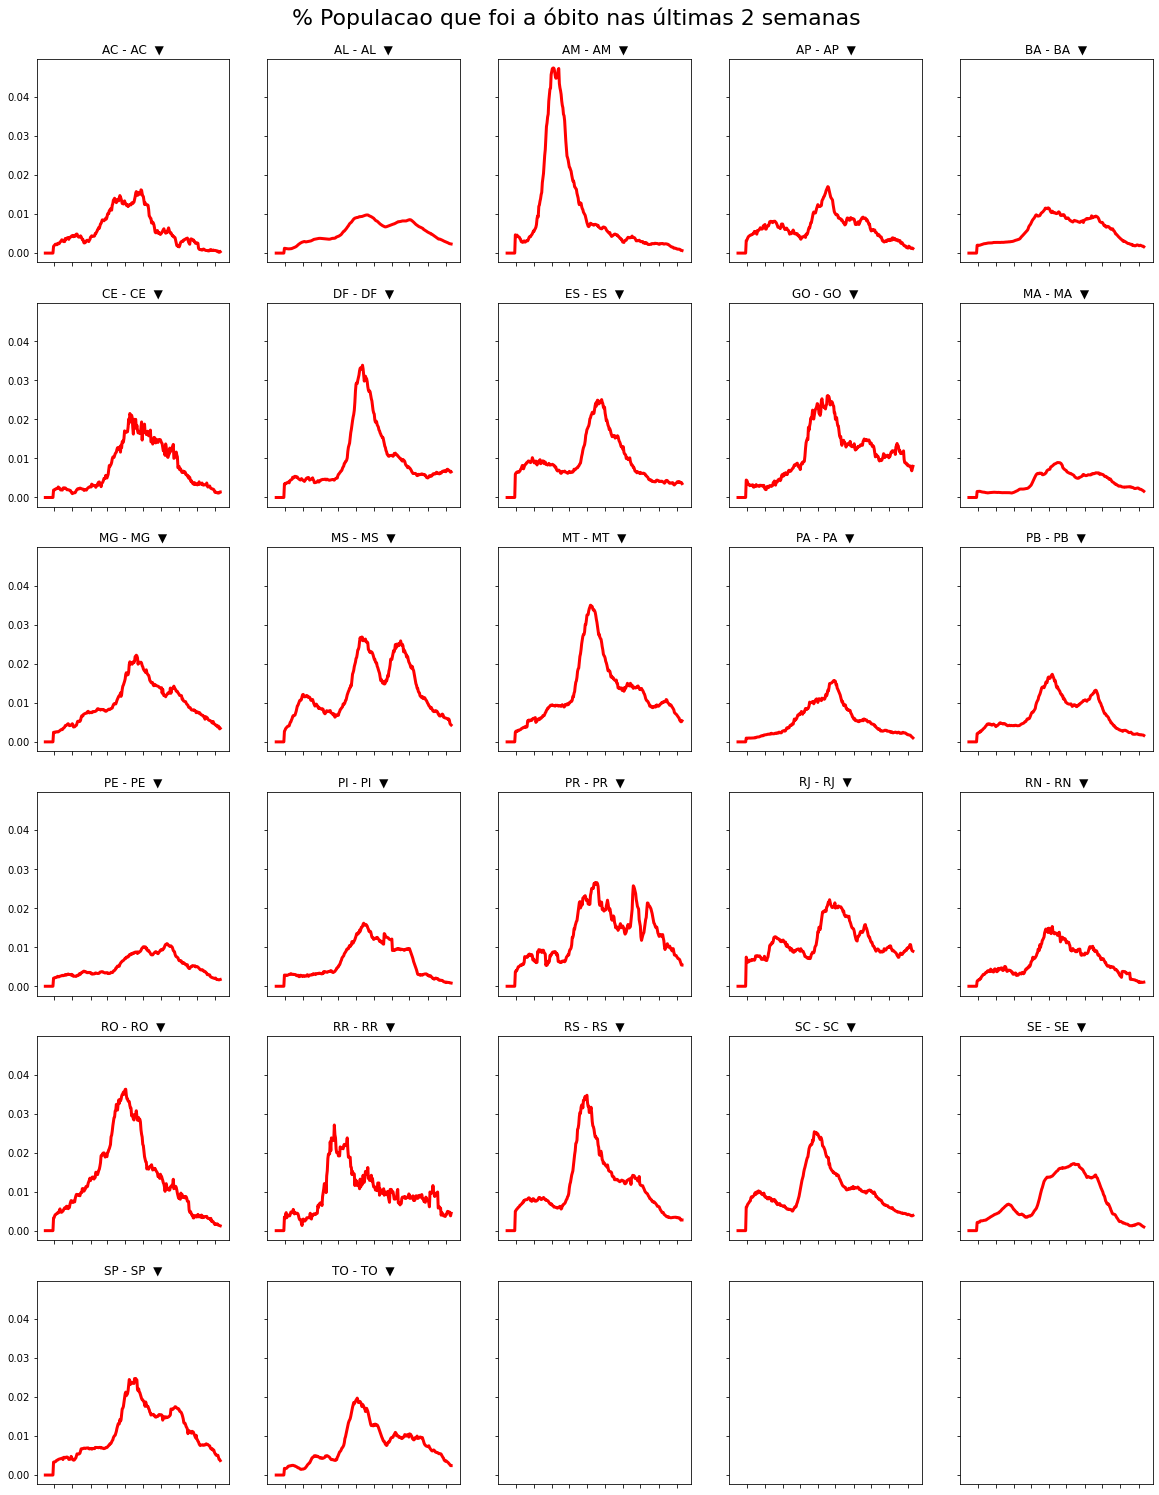

In [26]:
#Plota gráfico Obitos

indicador = 'obitos'

rows = int(len(df.values[id_ini:id_fim]) / cols) + 1

id_fim = id_fim+1

if tipo_local == "estado":
    id_local = 0
elif tipo_local == 'Mesorregiao':
    id_local = 1
elif tipo_local == 'Microrregiao':
    id_local = 2
else:
    id_local = 3


if indicador == 'casos':
    tipo = 'Dif_Quinz_Casos'    
else:
    tipo = 'Dif_Quinz_Obitos'
    

Xd = []
Yv = []
Zv = []
titulo = []

for i, local in enumerate(df.values[id_ini:id_fim]):    
    
    if tipo_local == 'municipio':
        Xd.append(difs[(difs[tipo_local]==local[id_local])&(difs['estado']==local[0])].data[:])
        Yv.append(list(difs[(difs[tipo_local]==local[id_local])&(difs['estado']==local[0])][tipo][:]))
        Zv.append(list(difs[(difs[tipo_local]==local[id_local])&(difs['estado']==local[0])]['populacao'][:]))
    else:
        Xd.append(difs[difs[tipo_local]==local[id_local]].data[:])
        Yv.append(list(difs[difs[tipo_local]==local[id_local]][tipo][:]))
        Zv.append(list(difs[difs[tipo_local]==local[id_local]]['populacao'][:]))        
    
    titulo.append(local[0] + ' - ' + local[id_local])
    

    X = diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])].data[:]
    W = list(diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])][tipo][:])
    Z = list(diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])]['populacao'][:])

    
        
fig, axs = plt.subplots(rows, cols, figsize=(np.min([cols*4,20]),rows*4), 
                        sharex=True, 
                        sharey=Sharey,
                       )

fig.suptitle("% Populacao que foi a óbito nas últimas 2 semanas" , fontsize=22)
fig.subplots_adjust(top=0.95)

i = 0

for r in range(rows):
    for c in range(cols):
        if (r < rows-1) or (c < len(df.values[id_ini:id_fim])-(cols*(rows-1))):
            
            M = []

            for j in range(len(Yv[i])):
                try:
                    M.append((Yv[i][j]/Zv[i][j])*100)
                except:
                    #print(titulo[i])
                    M.append(Yv[i][j]/100)
                
            axs[r, c].plot(Xd[i], M, 'r-',  linewidth=3)
            axs[r, c].set_title(titulo[i] + "  ▼", fontsize=12)
            axs[r, c].set_xticklabels([])
            i += 1
            

if Sharey == True:
    for ax in fig.get_axes():
        ax.label_outer()   
    
plt.savefig('grafico_obitos.png')

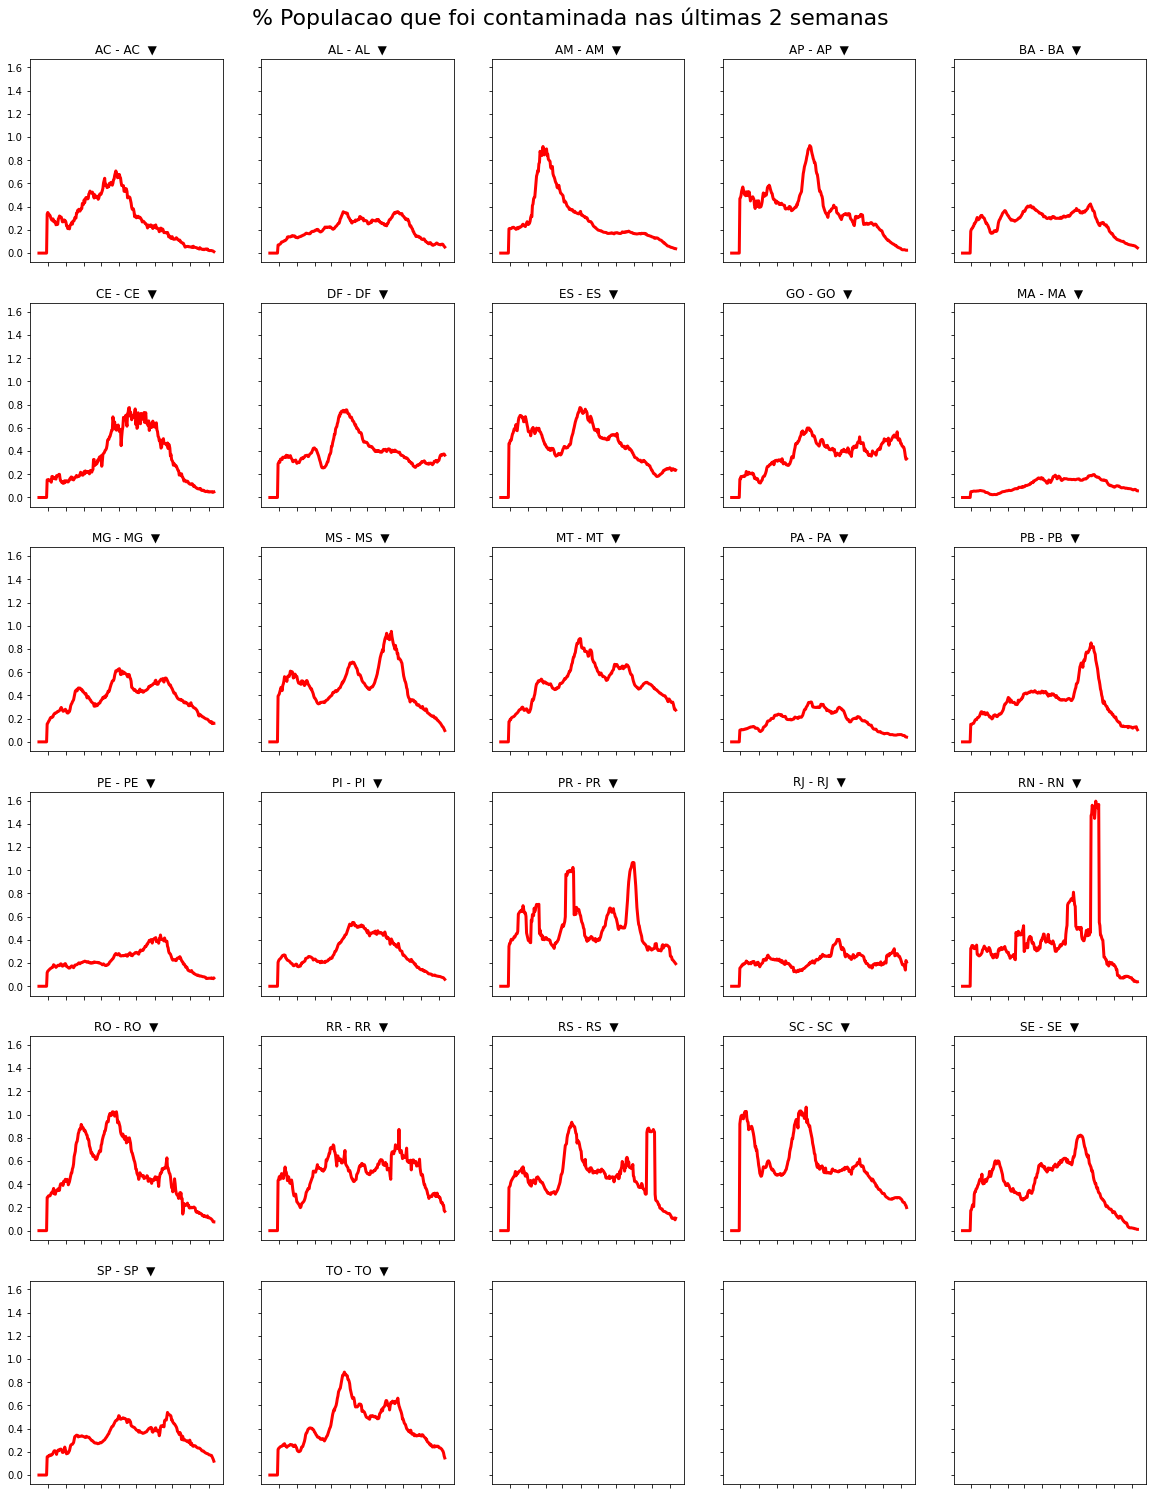

In [27]:
#Plota gráfico casos

indicador = 'casos'

rows = int(len(df.values[id_ini:id_fim]) / cols) + 1

id_fim = id_fim+1

if tipo_local == "estado":
    id_local = 0
elif tipo_local == 'Mesorregiao':
    id_local = 1
elif tipo_local == 'Microrregiao':
    id_local = 2
else:
    id_local = 3


if indicador == 'casos':
    tipo = 'Dif_Quinz_Casos'    
else:
    tipo = 'Dif_Quinz_Obitos'
    

Xd = []
Yv = []
Zv = []
titulo = []

for i, local in enumerate(df.values[id_ini:id_fim]):    
    
    if tipo_local == 'municipio':
        Xd.append(difs[(difs[tipo_local]==local[id_local])&(difs['estado']==local[0])].data[:])
        Yv.append(list(difs[(difs[tipo_local]==local[id_local])&(difs['estado']==local[0])][tipo][:]))
        Zv.append(list(difs[(difs[tipo_local]==local[id_local])&(difs['estado']==local[0])]['populacao'][:]))
    else:
        Xd.append(difs[difs[tipo_local]==local[id_local]].data[:])
        Yv.append(list(difs[difs[tipo_local]==local[id_local]][tipo][:]))
        Zv.append(list(difs[difs[tipo_local]==local[id_local]]['populacao'][:]))        
    
    titulo.append(local[0] + ' - ' + local[id_local])
    

    X = diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])].data[:]
    W = list(diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])][tipo][:])
    Z = list(diferencas_munic[(diferencas_munic['municipio']==Municipios.iloc[:,3][id]) & (diferencas_munic['estado']==Municipios.iloc[:,0][id])]['populacao'][:])

    
        
fig, axs = plt.subplots(rows, cols, figsize=(np.min([cols*4,20]),rows*4), 
                        sharex=True, 
                        sharey=Sharey,
                       )

fig.suptitle("% Populacao que foi contaminada nas últimas 2 semanas" , fontsize=22)
fig.subplots_adjust(top=0.95)

i = 0

for r in range(rows):
    for c in range(cols):
        if (r < rows-1) or (c < len(df.values[id_ini:id_fim])-(cols*(rows-1))):
            
            M = []

            for j in range(len(Yv[i])):
                try:
                    M.append((Yv[i][j]/Zv[i][j])*100)
                except:
                    #print(titulo[i])
                    M.append(Yv[i][j]/100)
                
            axs[r, c].plot(Xd[i], M, 'r-',  linewidth=3)
            axs[r, c].set_title(titulo[i] + "  ▼", fontsize=12)
            axs[r, c].set_xticklabels([])
            i += 1
            

if Sharey == True:
    for ax in fig.get_axes():
        ax.label_outer()   
    
plt.savefig('grafico_casos.png')